In [4]:
# Load necessary libraries
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
os.chdir("C:\\Users\\Ferah Shan\\Downloads")

In [31]:
# Load the dataset
df = pd.read_csv('kidney_disease.csv')


In [9]:
# Display the first few rows of the dataset
print(df.head())

   Unnamed: 0   age    bp     sg   al   su     rbc        pc         pcc  \
0           0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1           1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2           2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3           3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4           4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   

           ba  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  notpresent  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no   ckd  
1  notpresent  ...  38.0  6000.0   NaN   no   no   no   good   no   no   ckd  
2  notpresent  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes   ckd  
3  notpresent  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes   ckd  
4  notpresent  ...  35.0  7300.0   4.6   no   no   no   good   no   no   ckd  

[5 rows x 26 columns]


In [10]:
# Summary statistics of the dataset
print(df.describe())

       Unnamed: 0         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  \
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000   
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437   
std     79.281714   50.5030

In [11]:
# Check for missing values
print("Total missing values:", df.isnull().sum().sum())

Total missing values: 1012


In [12]:
# Custom function to calculate mode
def mode_function(series):
    return series.mode()[0]

In [13]:
# Function to impute missing values
def impute_missing_values(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(mode_function(df[col]), inplace=True)
    return df

In [14]:
# Impute missing values
df = impute_missing_values(df)

In [15]:
# Verify there are no more missing values
print("Total missing values after imputation:", df.isnull().sum().sum())

Total missing values after imputation: 0


In [16]:
# Ensure the target variable is a factor with exactly two levels
df['class'] = df['class'].astype('category')

In [17]:
# Convert target variable to numeric (1 for "ckd" and 0 for "notckd")
df['class'] = df['class'].apply(lambda x: 1 if x == "ckd" else 0)

In [18]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, drop_first=True)

In [19]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('class', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['class'] = df['class']

In [20]:
# Split the data into training and testing sets
X = df_scaled.drop('class', axis=1)
y = df_scaled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [21]:
# Check the distribution of the target variable in training and testing sets
print("Training set distribution:\n", y_train.value_counts())
print("Testing set distribution:\n", y_test.value_counts())

Training set distribution:
 class
1    170
0    110
Name: count, dtype: int64
Testing set distribution:
 class
1    78
0    42
Name: count, dtype: int64


Confusion Matrix:
 [[42  0]
 [ 0 78]]


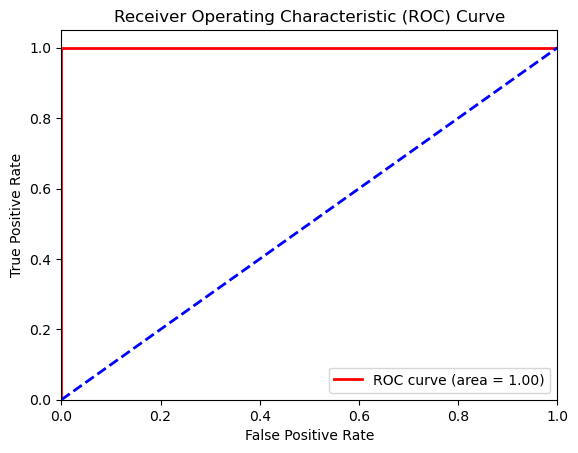

AUC-ROC: 1.0


In [39]:
# Split the data into training and test sets
X = df_scaled.drop(columns=['class'])
y = df_scaled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
predicted_probs = log_reg.predict_proba(X_test)[:, 1]
predicted_class = (predicted_probs >= 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_class)
print("Confusion Matrix:\n", conf_matrix)

# ROC and AUC
roc_auc = roc_auc_score(y_test, predicted_probs)
fpr, tpr, _ = roc_curve(y_test, predicted_probs)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc}")

Decision Tree Confusion Matrix:
 [[42  0]
 [ 1 77]]


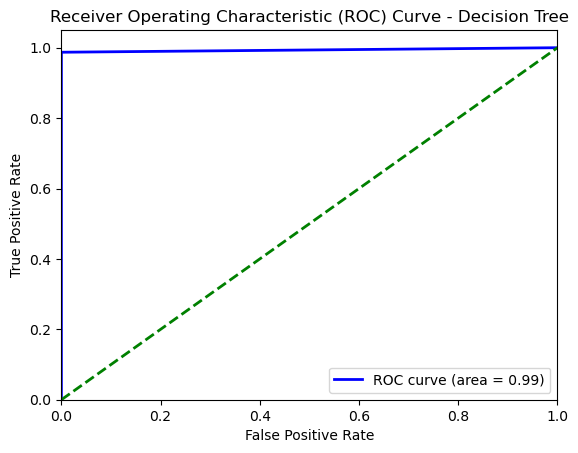

AUC-ROC (Decision Tree): 0.9935897435897436
Logistic Regression vs Decision Tree
Confusion Matrix (Logistic Regression):
 [[42  0]
 [ 0 78]]
Confusion Matrix (Decision Tree):
 [[42  0]
 [ 1 77]]
AUC-ROC (Logistic Regression): 1.0
AUC-ROC (Decision Tree): 0.9935897435897436


In [40]:
# Decision Tree Analysis
decision_tree = DecisionTreeClassifier(random_state=123)
decision_tree.fit(X_train, y_train)
dt_predicted_class = decision_tree.predict(X_test)
dt_predicted_probs = decision_tree.predict_proba(X_test)[:, 1]

# Confusion Matrix for Decision Tree
dt_conf_matrix = confusion_matrix(y_test, dt_predicted_class)
print("Decision Tree Confusion Matrix:\n", dt_conf_matrix)

# ROC and AUC for Decision Tree
dt_roc_auc = roc_auc_score(y_test, dt_predicted_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predicted_probs)
plt.figure()
plt.plot(dt_fpr, dt_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC (Decision Tree): {dt_roc_auc}")

# Compare the results
print("Logistic Regression vs Decision Tree")
print("Confusion Matrix (Logistic Regression):\n", conf_matrix)
print("Confusion Matrix (Decision Tree):\n", dt_conf_matrix)
print(f"AUC-ROC (Logistic Regression): {roc_auc}")
print(f"AUC-ROC (Decision Tree): {dt_roc_auc}")